# Stills API: Generating Sets of Responsive Images

Here we have three responsive-image information designs:

1. Gallery Image Strategy
2. Hero Image Strategy
3. Portrait Hero Image Strategy

In [1]:
from IPython import display
from IPython.core.interactiveshell import InteractiveShell
from wand.color import Color
from wand.drawing import Drawing
from wand.image import Image

InteractiveShell.ast_node_interactivity = 'all'

background_color_code = '#ff8c00' # DarkOrange https://en.wikipedia.org/wiki/Web_colors
text_color_code = '#fff'
font_location = '../fonts/ickyticket-mono-font/IckyticketMono-nKpJ.ttf'

w, h = 1920, 1080
output_filename = f'1080p_original_{w}x{h}.png'

with Color(background_color_code) as background_color:
    with Image(width=w, height=h, background=background_color) as img:
        img.save(filename=output_filename)

## Gallery Image Strategy

The design goal of the ‘gallery’ image is the desire to display an image at a _maximum_ resolution, full-screen, landscape orientation. This desire could be satisfied in a full-screen hero image layout or the typical gallery presentation.

We start with a Full HD (1080p) image: `1920x1080`

From the starting image we generate the following:

| name | size | operation
|- |-
| `gallery-720p` | `1280x720` | resize
| `gallery-sd` | `640x480` | crop 720p
| `gallery-thumb` | `120x120` | crop SD

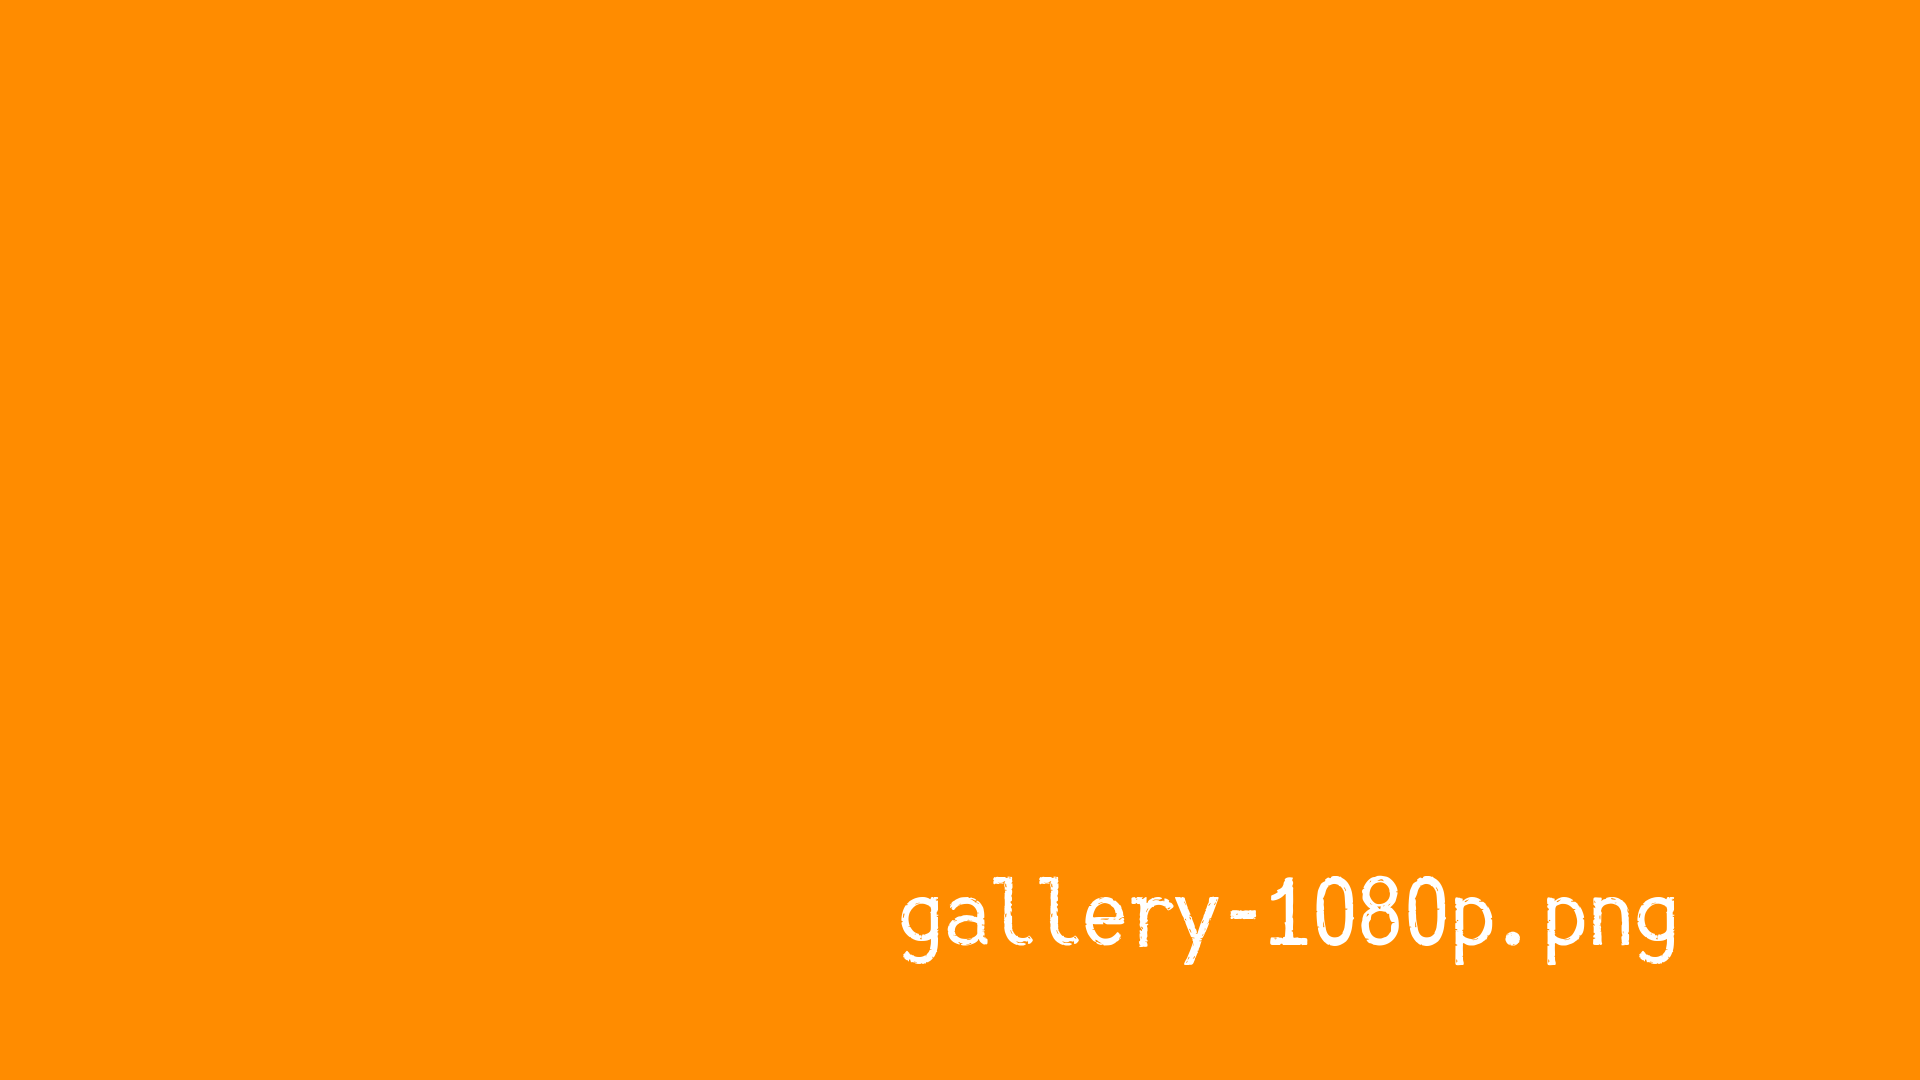

In [2]:
output_filename = f'gallery-1080p.png'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 96

        with Image(filename='./1080p_original_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/8), h - int(h/8)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_filename)

display.Image(filename=output_filename, width=800)

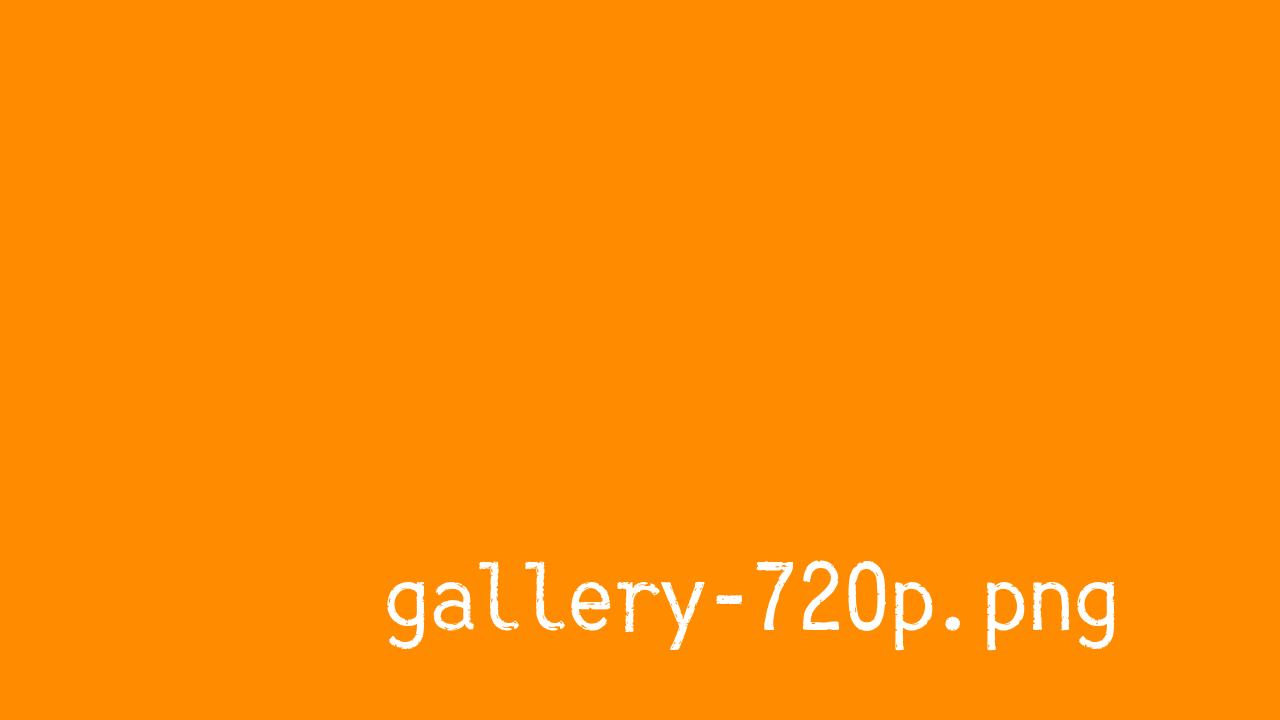

In [3]:
w, h = 1280, 720
output_filename = f'gallery-720p.png'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 96

        with Image(filename='./1080p_original_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/8), h - int(h/8)

                clone.resize(w, h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_filename)

display.Image(filename=output_filename, width=800)

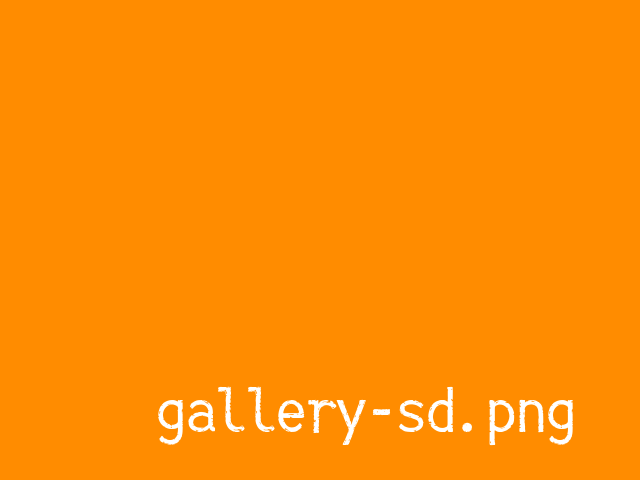

In [4]:
w, h = 640, 480
output_filename = f'gallery-sd.png'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 64

        with Image(filename='./gallery-720p.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/10), h - int(h/10)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_filename)

display.Image(filename=output_filename)

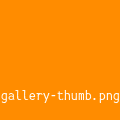

In [5]:
w, h = 120, 120
output_filename = f'gallery-thumb.png'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 14

        with Image(filename='./gallery-sd.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width, h - int(h/6)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_filename)

display.Image(filename=output_filename)

## Hero Image Strategy

One approach to a design based on the “hero” image is to start with a Full HD landscape and crop down, using rule-of-thirds vertical dimensions.

We start with a Full HD (1080p) image: `1920x1080`

From the starting image we generate the following with vertical, rule-of-thirds dimensions:

| name | size | operation(s)
|- |- |-
`hero-1080p` | `1920x640` | crop
`hero-720p` | `1280x240` | resize, crop

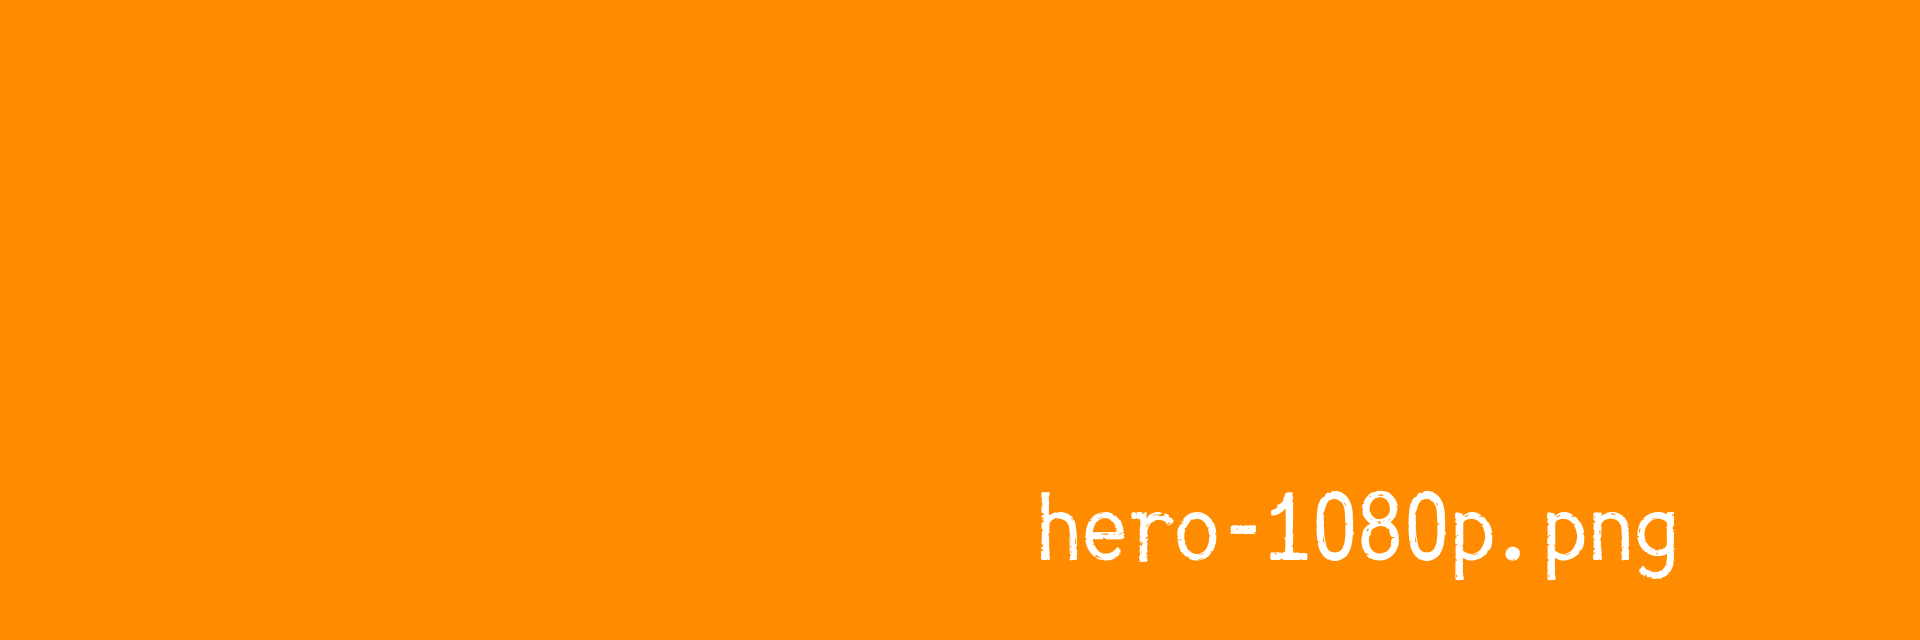

In [6]:
w, h = 1920, 640
output_filename = f'hero-1080p.png'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 96

        with Image(filename='./1080p_original_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/8), h - int(h/8)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_filename)

display.Image(filename=output_filename, width=800)

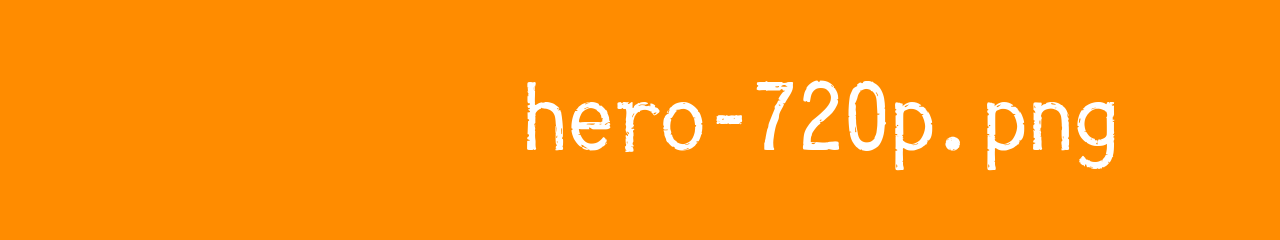

In [7]:
w, h, h_crop = 1280, 720, 240
output_filename = f'hero-720p.png'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 96

        with Image(filename='./1080p_original_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/8), h_crop - int(h/8)

                clone.resize(width=w, height=h)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h_crop)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_filename)

display.Image(filename=output_filename, width=800)

## Portrait Hero Image Strategy

Another approach to the “hero” image is the intent to lay it out with text, suggesting that this image will be in a portrait orientation, flowing with, say, text. This would be the typical 20<sup>th</sup> magazine layout of the print era.

We start with a Full HD (1080p) image: `1920x1080`

From the starting image we generate the following with horizontal, rule-of-thirds dimensions:

| name | size | operation(s)
|- |- |-
`hero-portrait-1080p` | `640x1080` | crop
`hero-portrait-720p` | `427x720` | resize, crop

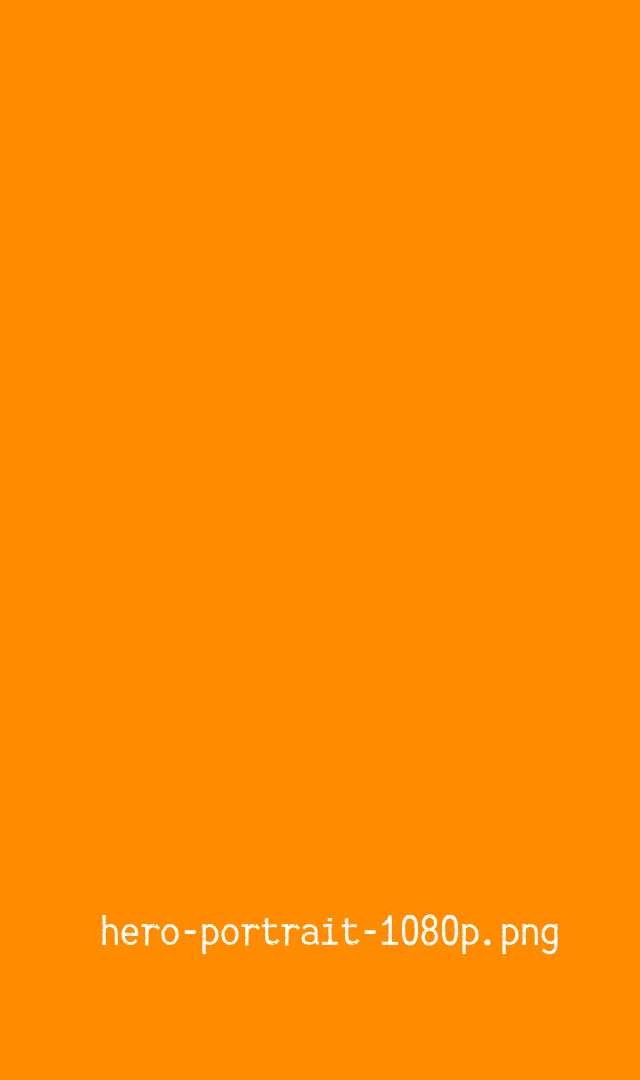

In [8]:
w, h = 640, 1080
output_filename = f'hero-portrait-1080p.png'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 42

        with Image(filename='./1080p_original_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/8), h - int(h/8)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_filename)

display.Image(filename=output_filename, width=800)

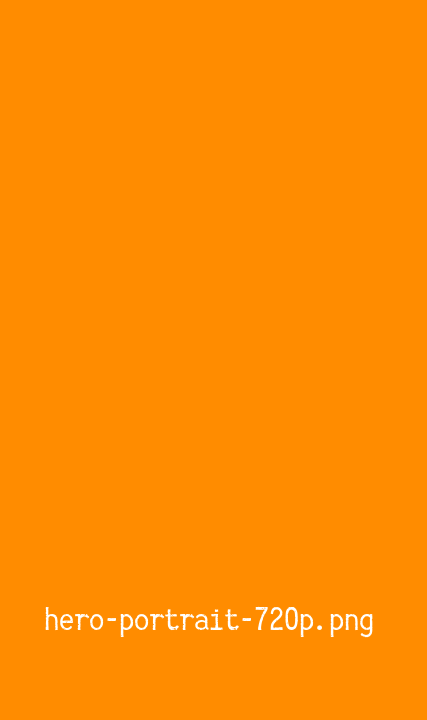

In [9]:
w, h, h_crop = 427, 721, 720
output_filename = f'hero-portrait-720p.png'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 32

        with Image(filename='./1080p_original_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/8), h_crop - int(h/8)

                clone.resize(width=w, height=h)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h_crop)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_filename)

display.Image(filename=output_filename, width=800)